# Deciding University Admissions

In [9]:
import _plotting

import matplotlib.pyplot as plt
import pandas
import numpy
import sklearn.tree
numpy.random.seed(0)

In [10]:
dataframe = pandas.read_csv("data/Admission_Predict.csv")
dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
dataframe.shape

(400, 9)

## The dataset

In [12]:
def process_admissions(dataframe):

    # Get actual column names from the dataframe
    column_admitted_chance = dataframe.columns[dataframe.columns.str.contains('Chance', case=False)][0]
    column_admitted = 'Admitted'
    columns_drop = [column_admitted_chance]

    dataframe_p = dataframe.copy()
    dataframe_p[column_admitted] = dataframe[column_admitted_chance] >= 0.75
    dataframe_p = dataframe_p.drop(columns = columns_drop)

    return dataframe_p

raw_admissions = pandas.read_csv('data/Admission_Predict.csv', index_col=0)
data = process_admissions(raw_admissions)

features = data.drop(columns = ['Admitted'])
columns_features = features.columns
features = features.values

labels = data['Admitted'].values

In [13]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


## Training a decision trees

In [14]:
# Makes customizing and trying different models easier.
# dict_params = {
#     "all_simpler" : { "max_depth": 3, "min_samples_leaf" : 10, "min_samples_split" : 10 },
#     "exams" :  { "max_depth": 2 }, # "min_samples_leaf" : 10, "min_samples_split" : 10 },
#     "exams_simpler" : { "max_depth": 1 },
# }

In [15]:

# Define decision tree parameters
dict_params = {
    "all_simpler" : { "max_depth": 3, "min_samples_leaf" : 10, "min_samples_split" : 10 },
    "exams" :  { "max_depth": 2 },
    "exams_simpler" : { "max_depth": 1 },
}

# Print explanation
for model, params in dict_params.items():
    print(f"🔹 Model: {model}")
    for param, value in params.items():
        print(f"   {param}: {value}")
    print()


🔹 Model: all_simpler
   max_depth: 3
   min_samples_leaf: 10
   min_samples_split: 10

🔹 Model: exams
   max_depth: 2

🔹 Model: exams_simpler
   max_depth: 1



## 1️⃣ max_depth (Maximum Depth of the Tree)
- Defines the **maximum number of splits** from the root to the deepest leaf node.
- Controls **overfitting**:
  - A **deep tree** (high `max_depth`) may overfit.
  - A **shallow tree** (low `max_depth`) may underfit.

### Example:
- `max_depth = 3`: Limits the tree to **3 levels deep**.
- `max_depth = None`: The tree grows until all leaves are pure.

🔹 **Usage in `dict_params`:**
```python
"all_simpler" : { "max_depth": 3 }
"exams" : { "max_depth": 2 }
"exams_simpler" : { "max_depth": 1 }




## 2️⃣ min_samples_leaf (Minimum Samples per Leaf)
- Defines the **minimum number of samples** required to form a **leaf node**.
- A leaf node is where a prediction is made.
- Higher values prevent **small, unnecessary splits**, improving generalization.

### Example:
- `min_samples_leaf = 1`: Each leaf contains at least **one** sample.
- `min_samples_leaf = 10`: Each leaf must have **at least 10 samples**.

🔹 **Usage in `dict_params`:**
```python
"all_simpler" : { "min_samples_leaf" : 10 }




## 3️⃣ min_samples_split (Minimum Samples for Splitting)
- Defines the **minimum number of samples** required to split an internal node.
- Higher values reduce overfitting by forcing the tree to grow only on **larger sample sizes**.

### Example:
- `min_samples_split = 2`: A node splits if **at least 2 samples** are present.
- `min_samples_split = 10`: A node splits only if **10 or more samples** exist.

🔹 **Usage in `dict_params`:**
```python
"all_simpler" : { "min_samples_split" : 10 }


### Decision Tree

Now we create a `DecisionTreeClassifier` object and use the `fit` method. We’ll train it using the Gini index, as shown next, so there is no need to specify the criterion hyperparameter, but go ahead and train it with entropy and compare the results with those that we get here:


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(features, labels)

DecisionTreeClassifier()

In [17]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [18]:
model_admissions = sklearn.tree.DecisionTreeClassifier()
model_admissions.fit(features, labels)
model_admissions.predict(features[0:5])
model_admissions.score(features, labels)

1.0

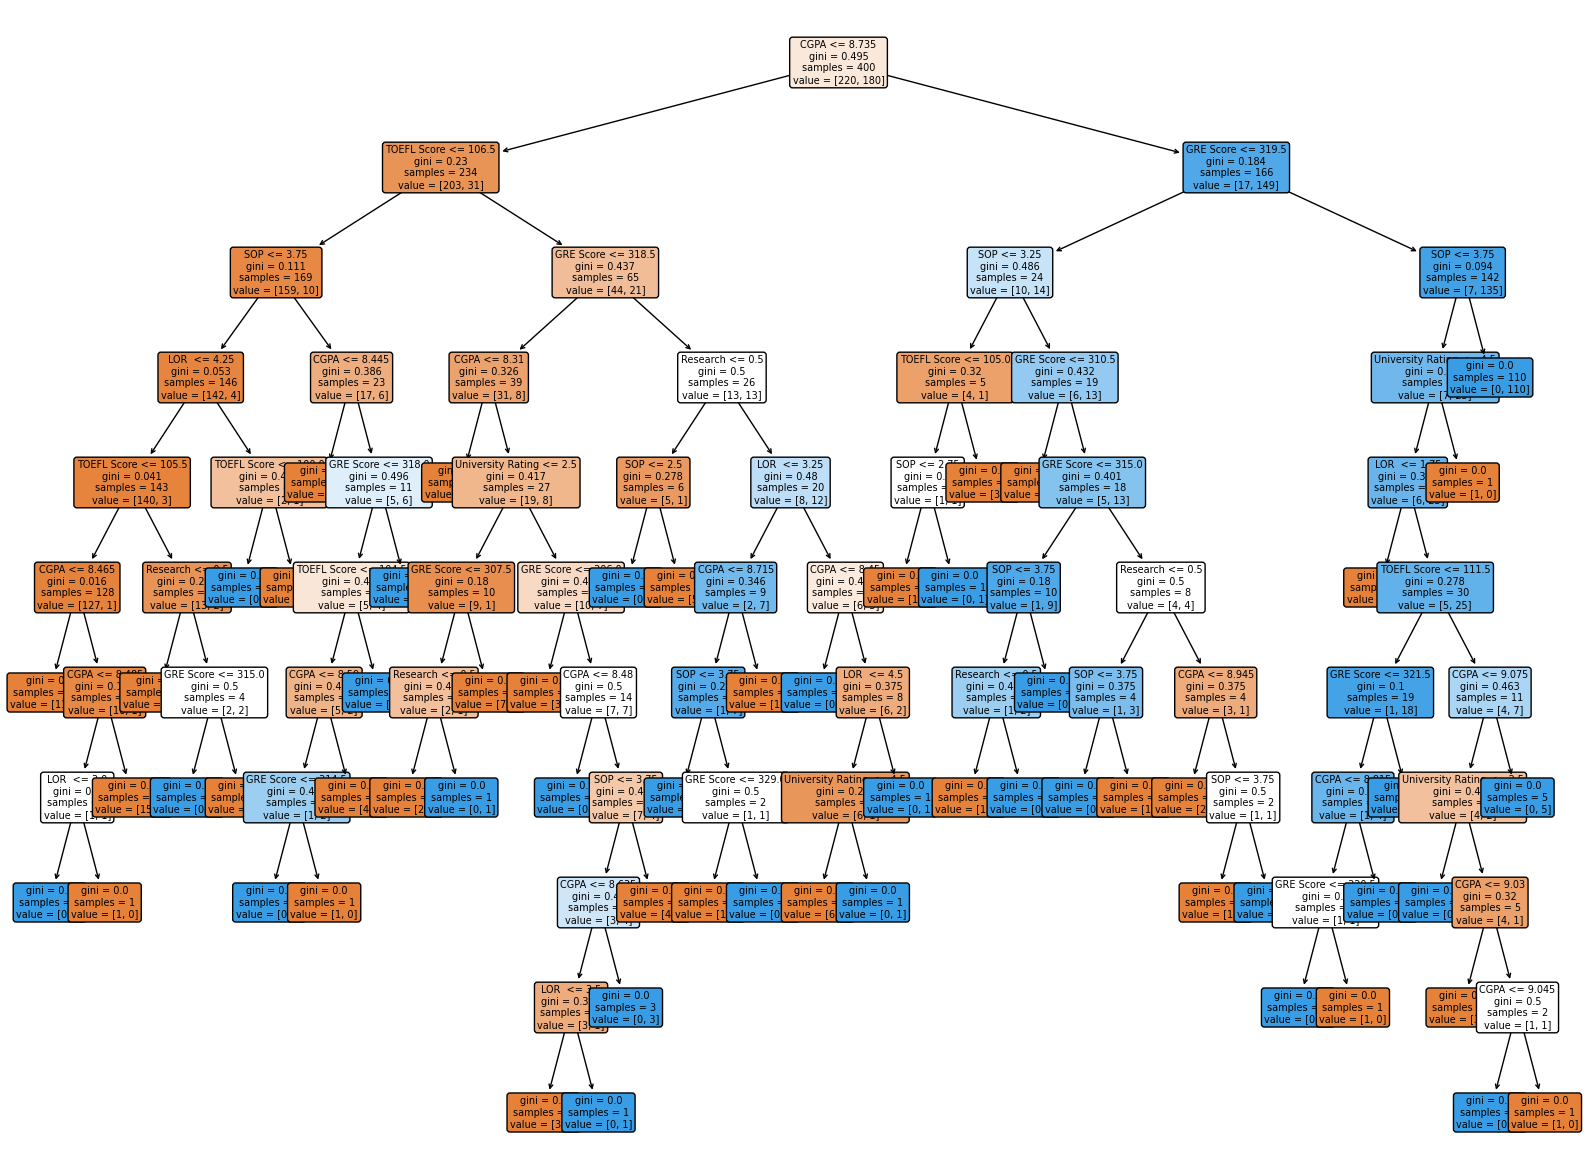

In [19]:
fig = plt.figure(figsize=(20,15))
sklearn.tree.plot_tree(model_admissions, feature_names=columns_features, filled=True, rounded=True, fontsize=7)
plt.show()

### Overfitting Problem

However, the decision tree we just trained massively overfits. One way to see this is by using the `score` function and realizing that it scores 100% in the training set. In this chapter, we won’t test the model, but will try building a testing set and verifying that this model overfits. Another way to see the overfitting is to plot the tree and notice that its depth is 10 (see the notebook). In the next section, we learn about some hyperparameters that help us prevent overfitting.

### Setting hyperparameters in Scikit-Learn
To prevent overfitting, we can use some of the hyperparameters that we learned in the section “Last step: When to stop building the tree and other hyperparameters,” such as the following:

* `max_depth`: the maximum allowed depth.
* `max_features`: the maximum number of features considered at each split (useful for when there are too many features, and the training process takes too long).
* `min_impurity_decrease`: the decrease in impurity must be higher than this threshold to split a node.
* `min_impurity_split`: when the impurity at a node is lower than this threshold, the node becomes a leaf.
* `min_samples_leaf`: the minimum number of samples required for a leaf node. If a split leaves a leaf with less than this number of samples, the split is not performed.
* `min_samples_split`: the minimum number of samples required to split a node. Play around with these parameters to find a good model. We’ll use the following:
* `max_depth` = 3
* `min_samples_leaf` = 10
* `min_samples_split` = 10

```python

dt_smaller = DecisionTreeClassifier(max_depth=3,
    min_samples_leaf=10, min_samples_split=10)
dt_smaller.fit(features, labels)
```

## Training a smaller tree that doesn't overfit

In [20]:
model_all_simpler = sklearn.tree.DecisionTreeClassifier(**dict_params["all_simpler"])
model_all_simpler.fit(features, labels)
model_all_simpler.score(features, labels)

0.885

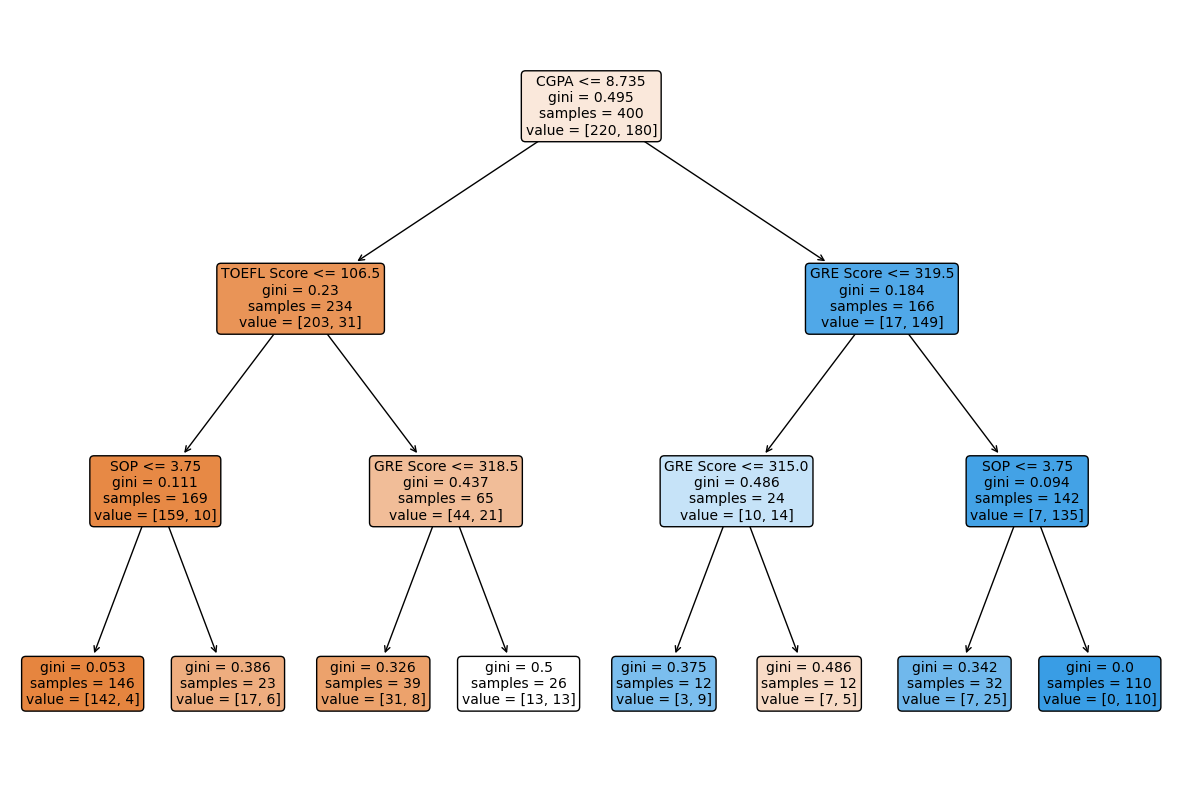

In [21]:
fig = plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(model_all_simpler, feature_names=columns_features, filled=True, rounded=True, fontsize=10)
plt.show()

### Using the tree to make predictions

In [22]:
model_all_simpler.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.9,
                     0]])

array([ True])

In [23]:
# A node in the white (neutral) leaf gets a false prediction
model_all_simpler.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.0,
                     0]])

array([False])

#### From this tree, we can infer the following things about our dataset:
* The most important feature is the sixth column (X5), corresponding to the CGPA, or the grades. The cutoff grade is 8.735 out of 10. In fact, most of the predictions to the right of the root node are “admit” and to the left are “not admit,” which implies that CGPA is a very strong feature.
* After this feature, the two most important ones are GRE score (X0) and TOEFL score (X1), both standardized tests. In fact, among the students who got good grades, most of them are likely to be admitted, unless they did poorly on the GRE, as accounted for by the sixth leaf from the left in the tree in figure 9.24.
* Aside from grades and standardized tests, the only other feature appearing in the tree is SOP, or the strength of the statement of purpose. This is located down in the tree, and it didn’t change the predictions much.

Recall, however, that the construction of the tree is greedy in nature, namely, at each point it selects the top feature. This doesn’t guarantee that the choice of features is the best, however. For example, there could be a combination of features that is very strong, yet none of them is strong individually, and the tree may not be able to pick this up. Thus, even though we got some infor- mation about the dataset, we should not yet throw away the features that are not present in the tree. A good feature selection algorithm, such as L1 regularization, would come in handy when selecting features in this dataset.

## Training a decision tree with only two features

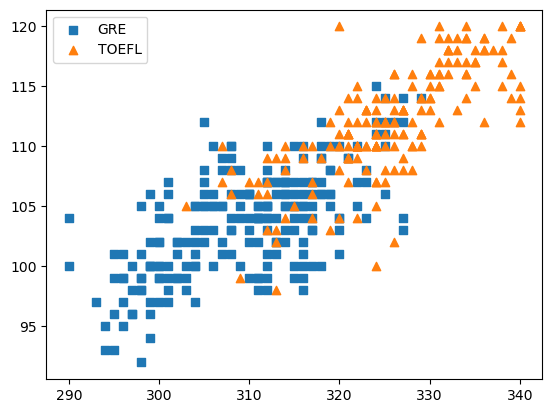

In [24]:
columns_exams = ['GRE Score', 'TOEFL Score']
# columns_exams = ['GRE Score', 'CGPA']

features_exams = data[columns_exams].values

# Plot the exam set
_plotting.plot_scatter(features_exams[labels == 0, 0], features_exams[labels == 0, 1], marker = 's')
_plotting.plot_scatter(features_exams[labels == 1, 0], features_exams[labels == 1, 1], marker = '^')
plt.legend(["GRE", "TOEFL"]) # not sure

## Fitting a tree of depth 2

In [25]:
model_admission_via_exams = sklearn.tree.DecisionTreeClassifier(**dict_params["exams"])
model_admission_via_exams.fit(features_exams, labels)

DecisionTreeClassifier(max_depth=2)

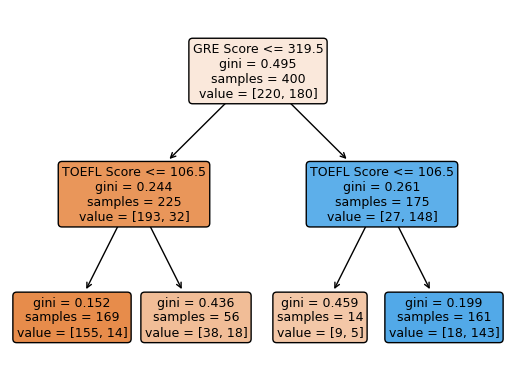

In [26]:
sklearn.tree.plot_tree(model_admission_via_exams, feature_names=columns_exams, filled=True, rounded=True, fontsize=9)
plt.show()

/home/elmunoz42/aimlbootcamp/aimlbootcamp/excercise-repo/module14/_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


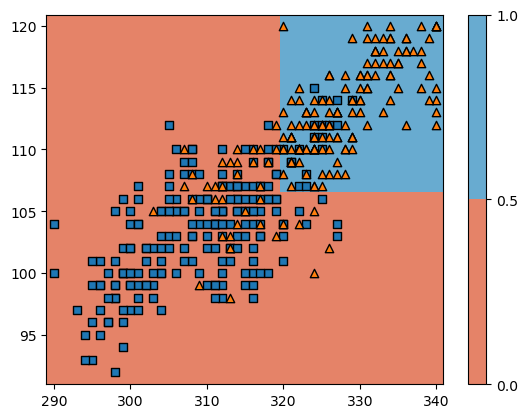

In [27]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams) # 25 size

## Fitting a tree of depth 1

In [28]:
model_admission_via_exams_simpler = sklearn.tree.DecisionTreeClassifier(**dict_params["exams_simpler"])
model_admission_via_exams_simpler.fit(features_exams, labels)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'GRE Score <= 319.5\ngini = 0.495\nsamples = 400\nvalue = [220, 180]'),
 Text(0.25, 0.25, 'gini = 0.244\nsamples = 225\nvalue = [193, 32]'),
 Text(0.75, 0.25, 'gini = 0.261\nsamples = 175\nvalue = [27, 148]')]

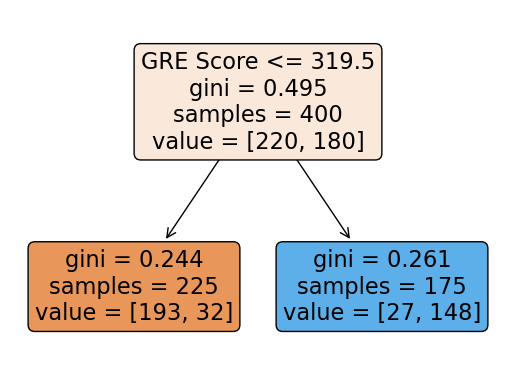

In [29]:
sklearn.tree.plot_tree(model_admission_via_exams_simpler, feature_names=columns_exams, filled=True, rounded=True)

/home/elmunoz42/aimlbootcamp/aimlbootcamp/excercise-repo/module14/_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


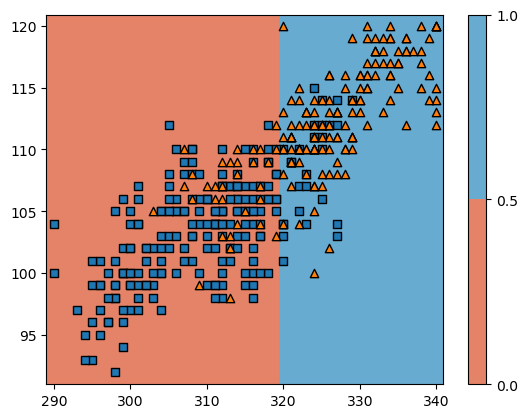

In [30]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams_simpler) # 25 size

## Fitting a tree of unbounded depth (overfitting)

In [31]:
model_admission_via_exams_crazy = sklearn.tree.DecisionTreeClassifier()
model_admission_via_exams_crazy.fit(features_exams, labels)

DecisionTreeClassifier()

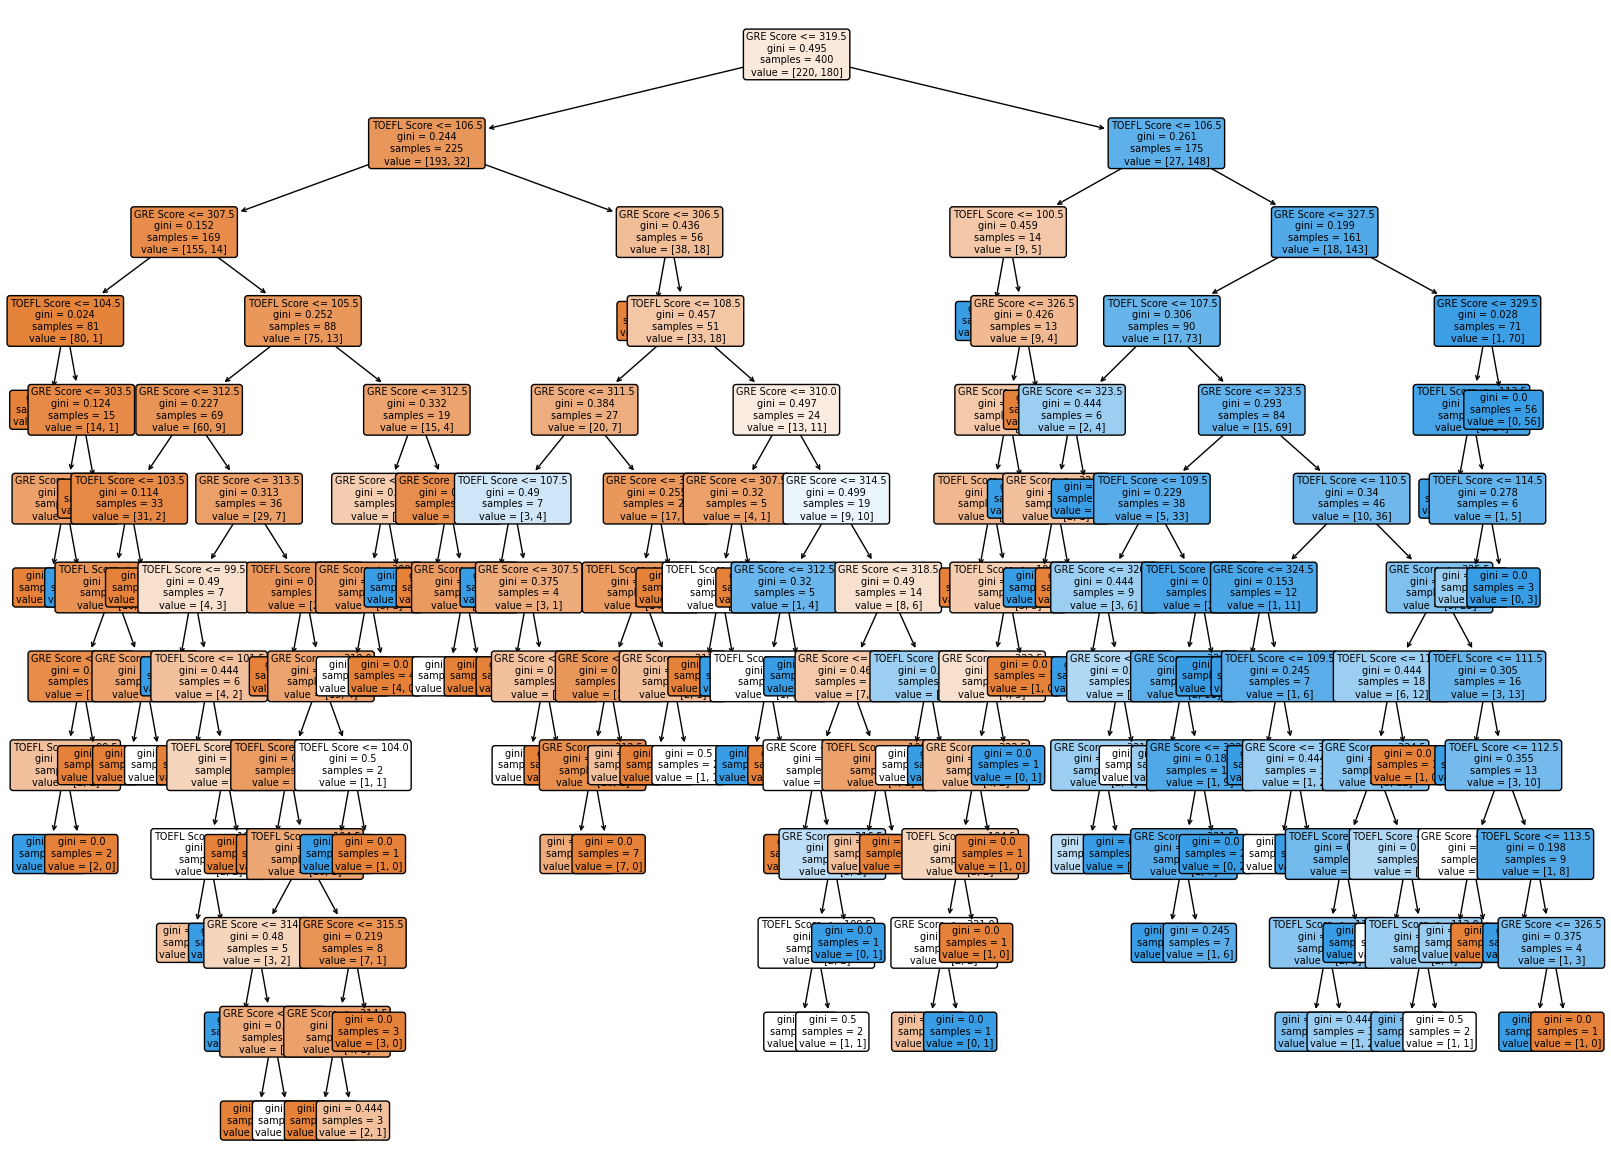

In [32]:
fig = plt.figure(figsize=(20,15))
sklearn.tree.plot_tree(model_admission_via_exams_crazy, feature_names=columns_exams, filled=True, rounded=True, fontsize=7)
plt.show()

/home/elmunoz42/aimlbootcamp/aimlbootcamp/excercise-repo/module14/_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


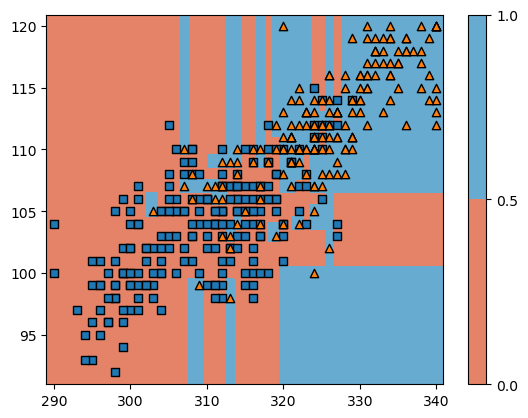

In [33]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams_crazy) # 25 size